
Hidden Markov Model in python - learn prams from data 
-----------------
[Theory explanation: Hidden Markov Models - Bert Huang](https://www.youtube.com/watch?v=9yl4XGp5OEg) || 
[More scary Code - PyTorch](https://colab.research.google.com/drive/1IUe9lfoIiQsL49atSOgxnCmMR_zJazKI) 

 <img src="https://images.slideplayer.com/16/4970773/slides/slide_4.jpg" alt="" width="1000" height="600">

## Preprocessing and baseline

In [1]:
from copy import copy, deepcopy
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from collections import Counter
from scipy import stats
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import mnist
%matplotlib inline

from hmmlearn.hmm import GaussianHMM, MultinomialHMM

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
X_train = mnist.train_images()
y_train = mnist.train_labels()
X_test = mnist.test_images()
y_test = mnist.test_labels()

y_train = np.array(y_train)
y_test = np.array(y_test)

# Normalize the images.
X_train = (X_train / 255) #- 0.5
X_test = (X_test / 255) #- 0.5

# Flatten the images.
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

print(X_train.shape) # (60000, 784)
print(X_test.shape)  # (10000, 784)

def plot(img_1d):
    plt.imshow(img_1d.reshape((28, 28)), cmap="Greys")
    
# plot(X_train[0])

(60000, 784)
(10000, 784)


In [3]:
# Apply a learning algorithm
print("Applying a learning algorithm...\n")
clf = RandomForestClassifier(n_estimators=50,n_jobs=4)
clf.fit(X_train, y_train)

# Make a prediction
print("Making predictions...\n")
y_pred = clf.predict(X_test)

# Evaluate the prediction
print("Evaluating results...\n")
print("Accuracy: \t", clf.score(X_test, y_test))

Applying a learning algorithm...



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

Making predictions...

Evaluating results...

Accuracy: 	 0.9658


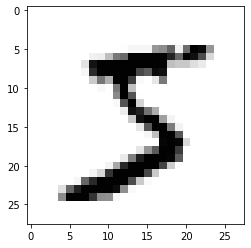

In [4]:
plot(X_train[0])

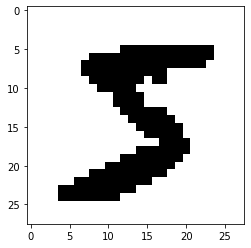

In [5]:
plot(np.ceil(X_train[0]))

In [6]:
def custom_round(i):
    if i == 0.0:
        return 0.0
    elif i < 0.25:
        return 0.25
    elif i < 0.50:
        return 0.50
    else:
        return 1

In [7]:
# round the colors of our data 
X_train = np.vectorize(custom_round)(X_train)
X_test = np.vectorize(custom_round)(X_test)

#### benchmark
``` python
%%timeit # 6.81 s ± 491 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
np.vectorize(custom_round)(X_train)

def ttt(X_train):
    for idx in range(len(X_train)):
        for i in range(len(X_train[idx])):
            X_train[idx][i] = test(i)
            
%%timeit 21.9 s ± 1.75 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
ttt(X_train)

```

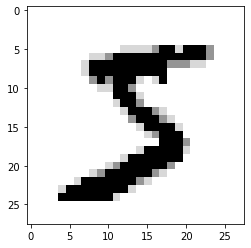

In [8]:
plot(X_train[0])

## HMM



In [9]:
## load
# with open("model 20k-20iter.pkl", "rb") as file: model = pickle.load(file)

In [ ]:
## Run 
model = GaussianHMM(n_components=10, covariance_type="full", n_iter = 10)
model.fit(X_train[:50000]) # max: 60000

In [ ]:
data = model.sample(15, random_state = None) #random_state/seed is inherited
print(data[0][0].shape) 

In [ ]:
idx = np.random.randint(15)
point = data[0][idx]# X_train[0]
idx
plt.imshow(point.reshape((28, 28)), cmap='gray')
plt.show()

### Match classes

In [ ]:
ls = [] 
for i in range(10):
    pred = model.predict(X_test[y_test == i])
    true_class = Counter(pred).most_common(3)
    print(f'Model class: {i} - most common elem(s): {true_class}.\t  Our models {i}, is considered a {true_class[0][0]}')
    ls.append([true_class[0][0], true_class[1][0], true_class[2][0]])

print(ls)

In [ ]:
rankings = deepcopy(ls)
assume = [i.pop(0) for i in ls]  
second_choice = [i.pop(0) for i in ls]   
third_choice = [i.pop(0) for i in ls]

    
print(assume)
print(second_choice)
print(third_choice)

print(rankings)  

In [ ]:
# manual changes
# ls = [8, 7, 5, 0, 4, 9, 3, 1, 8, 2]

def evaluate(mapping, label):

    score = 0
    points = np.where(y_test==label)[0] # as i recall, this is the same as `y_test == i` 
    predictions = model.predict(X_test[points])

    for idx, pred in enumerate(predictions):
        if(idx ==0):
            print(f'HMMs pred is {pred}. mapping[pred] is {mapping[pred]}, check if = {label}?')
        if(mapping[pred] == label):
            score += 1
    
    acc = score/len(points) * 100
    print(f'Mapping: {mapping}')
    print(f'Accuracy with our mapping: {acc:.2f}%')
    return acc

print(assume)

for i in range (10): 
    
    #select choices
    sec = deepcopy(assume)
    sec[i] = second_choice[i]

    thir = deepcopy(assume)
    thir[i] = third_choice[i]
    
    # compute & compare
    label = i # assume[i]
    best = np.argmax([evaluate(assume, label = label), evaluate(sec, label = label), evaluate(thir, label = label)])
#     best = np.argmax([evaluate(assume, label = i), evaluate(sec, label = i), evaluate(thir, label = i)]) # first attempt

    #update
    assume[i] = rankings[i][best]
assume

In [19]:
assume = [0, 7, 5, 0, 4, 8, 3, 1, 8, 1] #[8, 7, 5, 0, 8, 8, 3, 1, 8, 1]
score = 0
predictions = model.predict(X_test)
for idx, pred in enumerate(predictions):
    if(assume[pred] == y_test[idx]):
        score += 1

print(f'Accuracy with our mapping: {score/len(predictions) * 100:.2f}%')

pred = model.predict(X_test)
common = stats.mode(pred)[1][0]/pred.shape[0]
print(f'What if we called everyting our most common class: {common*100:.2f}')

Accuracy with our mapping: 21.08%
What if we called everyting our most common class: 24.10


In [12]:
model

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=10, n_iter=20, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

In [13]:
# save 
# pickle.dump(model, open("model 50k-10iter.pkl", "wb"))

In [14]:
# load
# with open("model.pkl", "rb") as file: pickle.load(file)